In [32]:
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass

@dataclass 
class Param:
    n =  1000
    eps  = 0.5
    lr = 0.01
    epochs = 100
    batch_size = 50

x = np.random.randn(Param.n,2)
w = np.random.randn(2)
e = np.random.randn(Param.n)
y = np.dot(x,w) + Param.eps * e

In [33]:
w_hat = np.zeros(2)

def pred(x,w_hat):
    return np.dot(x,w_hat)
def loss(w_hat):
    return np.mean((y-pred(x,w_hat))**2)
def grad(w_hat,idx=range(x.shape[0])):
    return np.dot(x[idx,:].T, pred(x[idx,:],w_hat)-y[idx])/len(idx)

def gradient_descent(w_hat):
    return w_hat - Param.lr * grad(w_hat)
def mini_batch_gradient_descent(w_hat,bs=Param.batch_size):
    shuffle = np.random.permutation(Param.n)
    for i in range(0,Param.n,bs):
        idx = shuffle[i:i+bs]
        w_hat = w_hat - Param.lr * grad(w_hat,idx)
    return w_hat
def stochastic_gradient_descent(w_hat):
    shuffle = np.random.permutation(Param.n)
    for i in shuffle:
        w_hat = w_hat - Param.lr * grad(w_hat,[i])
    return w_hat

def update(batch_size):
    return lambda x:mini_batch_gradient_descent(x,batch_size)

In [38]:
Param.lr = 0.01
Param.epochs = 200

def train(w_hat, update):
    w_hat = np.zeros(2)
    para_history = []
    loss_history = []
    para_history.append(w_hat)
    loss_history.append(loss(w_hat))
    for i in range(Param.epochs):
        w_hat = update(w_hat)
        para_history.append(w_hat)
        loss_history.append(loss(w_hat))
    return para_history, loss_history

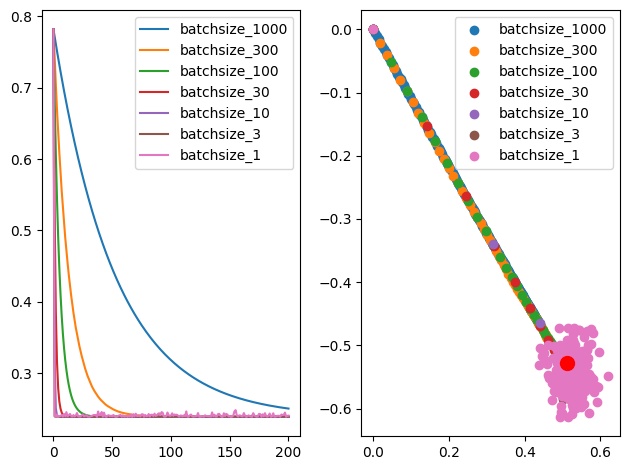

In [41]:
phs = []
lhs = []
batchsizes = [Param.n,300,100,30,10,3,1]
for batch_size in batchsizes:
    param_history, loss_history = train(w_hat, update(batch_size))
    phs.append(param_history)
    lhs.append(loss_history)   

plt.subplot(1,2,1)
for lh in lhs:
    plt.plot(lh)
plt.legend([f'batchsize_{bs}' for bs in batchsizes])
plt.subplot(1,2,2)
for ph in phs:
    pltx,plty = zip(*np.array(ph))
    plt.scatter(pltx,plty)
plt.scatter(w[0],w[1],s=100,c='r')
plt.legend([f'batchsize_{bs}' for bs in batchsizes])
plt.tight_layout()
plt.show()